<a href="https://colab.research.google.com/github/lukassso/python-mini-projects/blob/master/unsupervised_learning_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('blobs.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      750 non-null    float64
 1   x2      750 non-null    float64
 2   label   750 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 17.7 KB


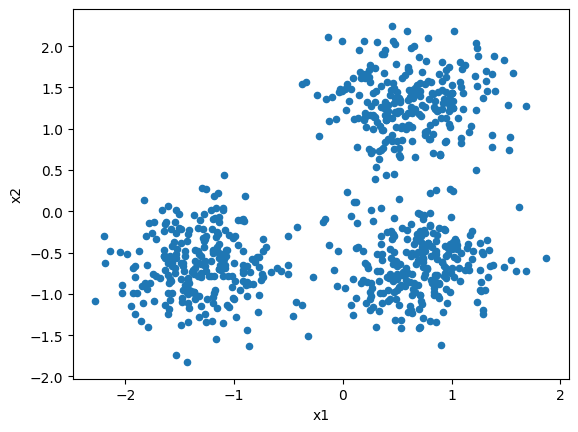

In [ ]:
X = df[['x1', 'x2']]
df.plot(x='x1', y='x2', kind='scatter');

In [ ]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=4, n_init=10)
km.fit(X)
km.inertia_

186.4768042505818

In [ ]:
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(X, km.labels_)

0.793005041170042

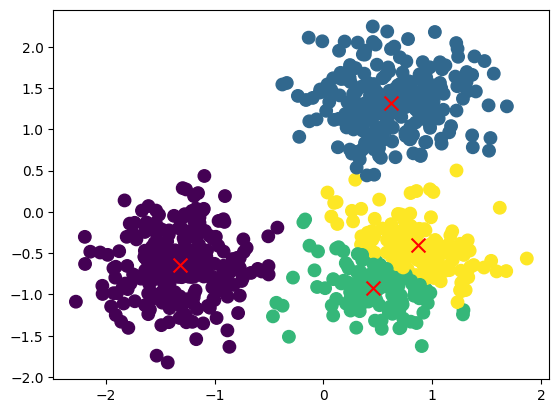

In [ ]:
#plt.scatter(x=df['x1'], y=df['x2'], c=df['label'], marker='o', s=150, cmap='viridis')
plt.scatter(x=df['x1'], y=df['x2'], c=km.labels_, marker='o', s=80, cmap='viridis')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], marker='x', c='red', s=100);

In [ ]:
inertia = []
dbs = []
for nc in range(2, 8):
  km = KMeans(n_clusters=nc, n_init=10)
  km.fit(X)
  inertia.append(km.inertia_)
  dbs.append(davies_bouldin_score(X, km.labels_))

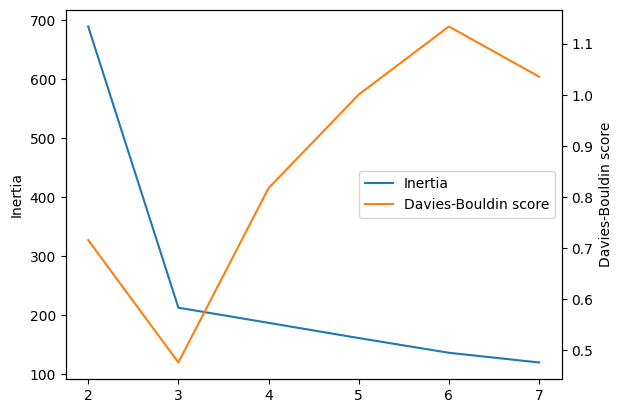

In [ ]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
l1, = ax1.plot(range(2, 8), inertia, color='C0', label='Inertia')
l2, = ax2.plot(range(2, 8), dbs, color='C1', label='Davies-Bouldin score')
ax1.set_ylabel('Inertia')
ax2.set_ylabel('Davies-Bouldin score')
ax1.legend(handles=[l1, l2], loc='center right');

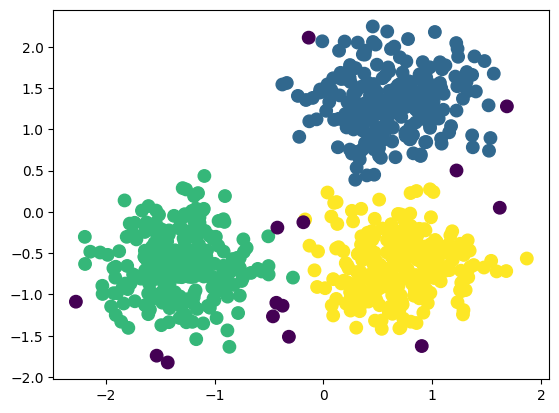

In [ ]:
from sklearn.cluster import dbscan
core_samples, labels = dbscan(X, eps=0.25, min_samples=5)
plt.scatter(x=df['x1'], y=df['x2'], c=labels, marker='o', s=80, cmap='viridis');

In [ ]:
np.unique(labels)

array([-1,  0,  1,  2])

In [ ]:
df1 = pd.read_csv('moons.csv')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       100 non-null    float64
 1   Y       100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


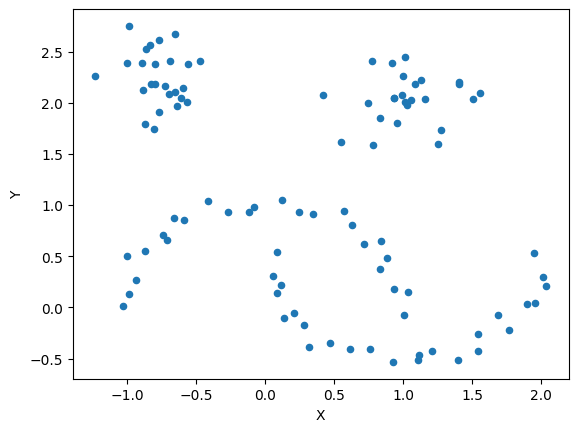

In [ ]:
X1 = df1[['X', 'Y']]
df1.plot(x='X', y='Y', kind='scatter');

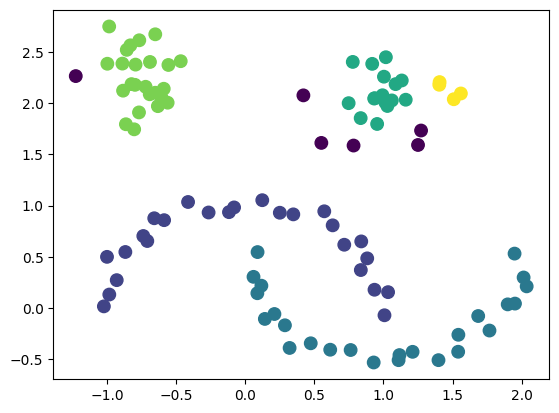

In [ ]:
core_samples, labels = dbscan(X1, eps=0.25, min_samples=3)
plt.scatter(x=df1['X'], y=df1['Y'], c=labels, marker='o', s=80, cmap='viridis');

In [ ]:
np.unique(labels)

array([-1,  0,  1,  2,  3])

In [ ]:
davies_bouldin_score(X1, labels)

1.1819784227269292